### Générateur et analyse audio sous python

test


In [1]:
import numpy as np
import simpleaudio as sa #pip install simpleaudio
from scipy.fft import rfft, rfftfreq, fft, ifft
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

frequency = 440  # Our played note will be 440 Hz
fs = 44100  # 44100 samples per second
seconds = 1  # Note duration of 3 seconds

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs, False)

# Generate a 440 Hz sine wave
note = np.sin(frequency * t * 2 * np.pi)

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
# Convert to 16-bit data
audio = audio.astype(np.int16)

# Start playback
play_obj = sa.play_buffer(audio, 1, 2, fs)

# Wait for playback to finish before exiting
play_obj.wait_done()


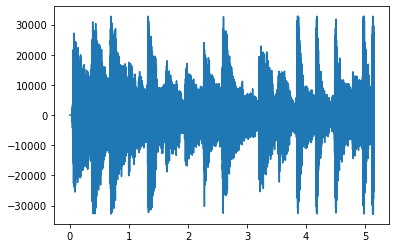

In [10]:
a = read("noel.wav")
s = np.array(a[1],dtype=float)
s = s[:,1] #sortie gauche
plt.figure()
plt.plot(t,s)
plt.show()

In [11]:
filename = 'noel.wav'
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()
play_obj.wait_done()  # Wait until sound has finished playing

[438.58264594]
Fréquence maximale avant repliement : 11025 Hz


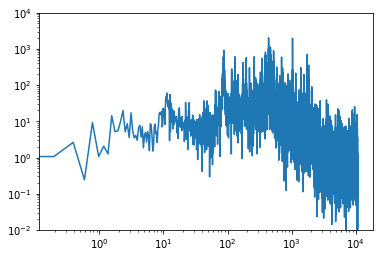

In [44]:
L = np.size(s)
t = np.linspace(0,L/22050,L, False)#pas toutes les ... ms
#t = np.linspace(0, seconds, seconds * fs, False)
Hz = s#1*np.sin(2*np.pi*10*t) #signal sinusoïdal à ... Hz
fftHz = rfft(Hz)
freq = rfftfreq(L, t[1] )
print(freq[np.where(np.abs(fftHz)==np.max(np.abs(fftHz)))])
print("Fréquence maximale avant repliement : {:.0f} Hz".format(0.5/t[1]))
plt.figure()
plt.plot(freq,np.abs(fftHz*2/L))
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-2,1e4])
plt.show()

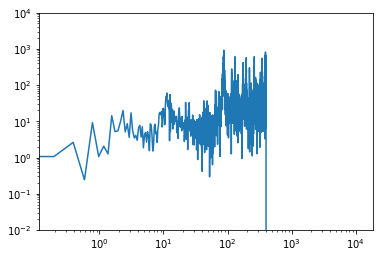

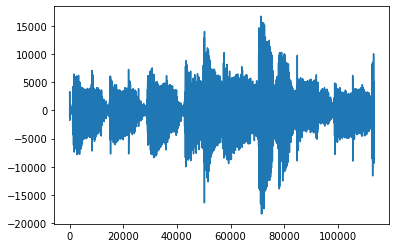

In [120]:
taille = np.size(fft(s))
Filtre = []
for i in range(taille):
    if abs(i-taille//2) < 55000:# and abs(i-taille//2) > 4000:
        Filtre.append(0)
    else:
        Filtre.append(1)
Filtre2 = []
for f in freq:
    if f > 400 :
        Filtre2.append(0)
    else:
        Filtre2.append(1)
Filtre2 = Filtre2[1:]+Filtre2[-1:0:-1]
Filtre2 = np.array(Filtre2)
Filtre3 = []
for f in freq:
    if f < 1500 :
        Filtre3.append(0)
    else:
        Filtre3.append(1)
Filtre3 = Filtre3[1:]+Filtre3[-1:0:-1]
Filtre3 = np.array(Filtre3)

Filtre = np.array(Filtre)
plt.figure()
plt.plot(freq,np.abs(Filtre2*fft(s))[0:taille//2+1]*2/taille)
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-2,1e4])
plt.show()
plt.figure()
plt.plot(np.real(ifft(Filtre2*fft(s))))
plt.show()

In [129]:
# Generate a 440 Hz sine wave
extrait = np.real(ifft(Filtre2*fft(s)))
#extrait = np.real(ifft(fft(s)))

# Ensure that highest value is in 16-bit range
audio = extrait * (2**15 - 1) / np.max(np.abs(extrait))
# Convert to 16-bit data
audio = audio.astype(np.int16)

# Start playback
play_obj = sa.play_buffer(audio, 1, 2, 22050)

# Wait for playback to finish before exiting
play_obj.wait_done()

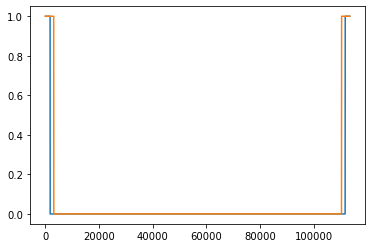

In [113]:
Filtre2 = []
for f in freq:
    if f > 600 :
        Filtre2.append(0)
    else:
        Filtre2.append(1)
Filtre2 = Filtre2[1:]+Filtre2[-1:0:-1]
plt.figure()
plt.plot(Filtre)
plt.plot(Filtre2)
plt.show()

In [96]:
Filtre2[3086]

1

In [91]:
a=[1,2,3,4]
a[-1:0:-1]

[4, 3, 2]